In [1]:
import nengo
import nengo.spa as spa
from nengo.spa import Vocabulary
import numpy as np

In [2]:
rng = np.random.RandomState(10)
dim = 64

vocab = Vocabulary(dimensions=dim, rng=rng, max_similarity=0.02, unitary=True)
# without unitary, it works for 10->11 but not for three->four
#zero = spa.SemanticPointer(dim)

incr = vocab.parse("INCREMENT")
parity = vocab.parse("PARITY")

vocab.parse("ZERO")
vocab.add("ONE", vocab.parse("ZERO*INCREMENT"))
vocab.add("TWO", vocab.parse("ONE*INCREMENT"))
vocab.add("THREE", vocab.parse("TWO*INCREMENT"))
vocab.add("FOUR", vocab.parse("THREE*INCREMENT"))
vocab.add("FIVE", vocab.parse("FOUR*INCREMENT"))
vocab.add("SIX", vocab.parse("FIVE*INCREMENT"))
vocab.add("SEVEN", vocab.parse("SIX*INCREMENT"))
vocab.add("EIGHT", vocab.parse("SEVEN*INCREMENT"))
vocab.add("NINE", vocab.parse("EIGHT*INCREMENT"))
vocab.add("TEN", vocab.parse("NINE*INCREMENT"))
vocab.add("ELEVEN", vocab.parse("TEN*INCREMENT"))


zero = vocab.parse("NUMBER*ZERO+PARITY*EVEN")
one = vocab.parse("NUMBER*ONE+PARITY*EVEN")
two = vocab.parse("NUMBER*TWO+PARITY*EVEN")
three = vocab.parse("NUMBER*THREE+PARITY*ODD")
four = vocab.parse("NUMBER*FOUR+PARITY*EVEN")
five = vocab.parse("NUMBER*FIVE+PARITY*ODD")
six = vocab.parse("NUMBER*SIX+PARITY*EVEN")
seven = vocab.parse("NUMBER*SEVEN+PARITY*ODD")
eight = vocab.parse("NUMBER*EIGHT+PARITY*ODD")
nine = vocab.parse("NUMBER*NINE+PARITY*EVEN")
ten = vocab.parse("NUMBER*TEN+PARITY*EVEN")
eleven = vocab.parse("NUMBER*ELEVEN+PARITY*EVEN")

vocab.add("ZERO_W", zero)
vocab.add("ONE_W", one)
vocab.add("TWO_W", two)
vocab.add("THREE_W", three)
vocab.add("FOUR_W", four)
vocab.add("FIVE_W", five)
vocab.add("SIX_W", six)
vocab.add("SEVEN_W", seven)
vocab.add("EIGHT_W", eight)
vocab.add("NINE_W", nine)
vocab.add("TEN_W", ten)
vocab.add("ELEVEN_W", eleven)

/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=64, M=14)
  len(self.pointers)))
/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=64, M=15)
  len(self.pointers)))
/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=64, M=16)
  len(self.pointers)))


In [3]:
# Compute the transformation and convert it into a SP object
T = (~zero*one + ~one*two + ~two*three + ~three*four + ~four*five + ~five*six + ~six*seven + ~seven*eight).v / 8
T = spa.SemanticPointer(T)
print (type(T))

# As expected, the transformation vector is very similar to the increment vector
print (T.v)
print (incr.v)
print (np.dot(incr.v, T.v))   # dot product ~ 1

<class 'nengo.spa.pointer.SemanticPointer'>
[ 0.54590126  0.07940776 -0.10398846  0.01498496  0.33461126 -0.11140088
  0.11257167 -0.1439504   0.05715076 -0.13018858  0.2604368   0.20810509
 -0.33238613  0.23949776  0.11985811  0.23196114 -0.33251699  0.22900482
  0.37331417 -0.02219452 -0.20242384 -0.04024673 -0.09780444  0.41686089
  0.20578964  0.18482321  0.01861203  0.32780088  0.1517508   0.08182004
 -0.03970759 -0.18765011  0.21482312 -0.08272053  0.05467474 -0.03595924
  0.25073803  0.02580783  0.16439188 -0.08779272 -0.01178584 -0.04127706
 -0.15136925  0.13024602 -0.18987927 -0.07216084  0.21746007  0.10796277
 -0.10943225  0.05121688  0.17158631  0.17627878 -0.15850619  0.10723612
  0.26064609  0.06844202  0.26451403 -0.13272053  0.08854274 -0.01668893
  0.10503374 -0.00115008  0.25739301 -0.07535582]
[ 1.50805540e-01  6.60654021e-02 -2.03853357e-01 -3.96528760e-03
  1.31651820e-01 -5.60572067e-02  5.99014713e-02  4.62287003e-02
  6.38557294e-02 -6.30091179e-02  1.52022845e-

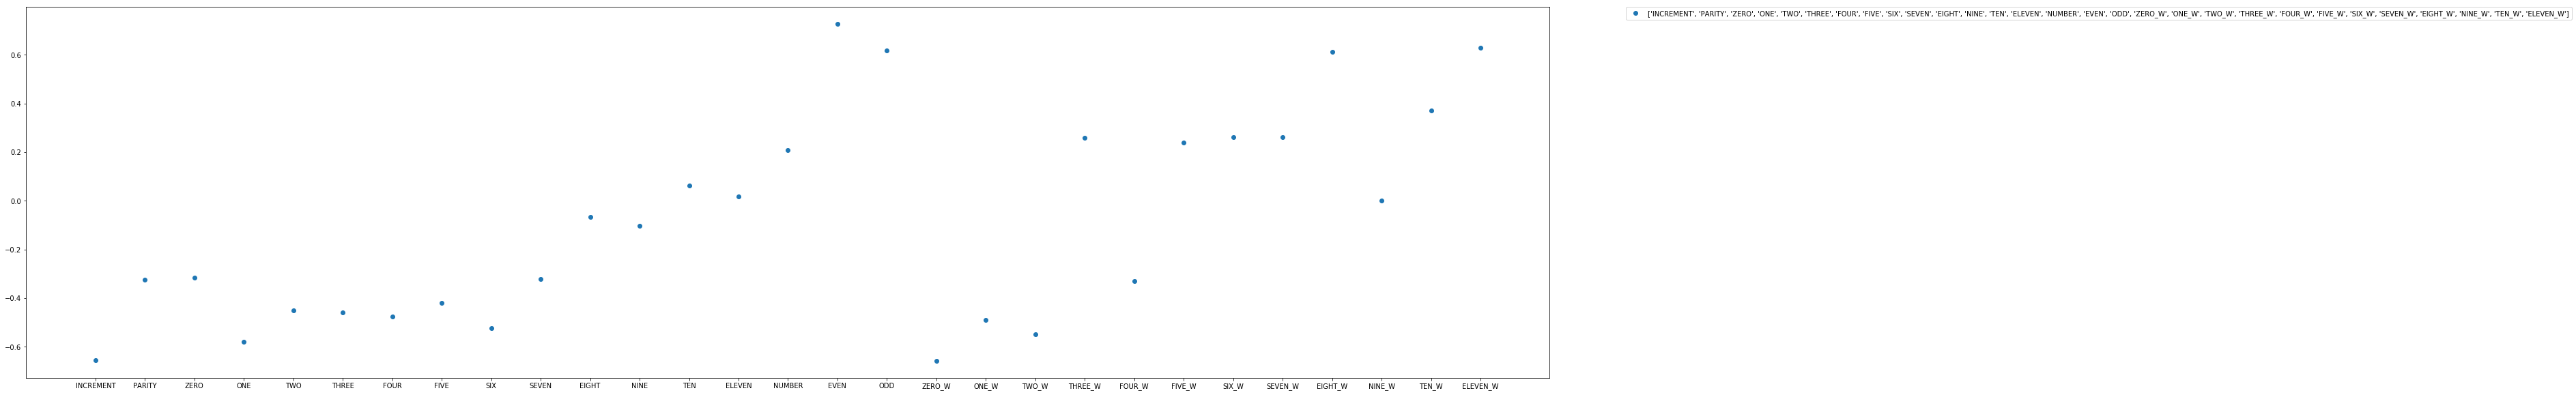

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


succ = (three * T)
even_odd = ~parity*succ
test = even_odd.v

similarity = []
for sp_name in vocab.keys:
    vec = vocab.parse(sp_name).v
    similarity.append(np.dot(test, vec))
 
   
#similarity = vocab.dot(test)    # compute dot product with each vector in the vocab
  
plt.figure(figsize = (40,10))    
plt.plot(vocab.keys, similarity, 'o', label=vocab.keys)   
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

While successor relationship is beautifully captured, even-odd parity is not captured since the pattern is so irregular.